# Overturning

Example code to diagnose overturning in density space from `mom6-panan` simulations.

In [3]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm

In [4]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)
expts = ['panant-v2','panant-hycom1']

In [5]:
client = Client()
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34743,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:40863,Total threads: 4
Dashboard: http://127.0.0.1:43241/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:44567,


## Plot overturning over first year for both expts

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


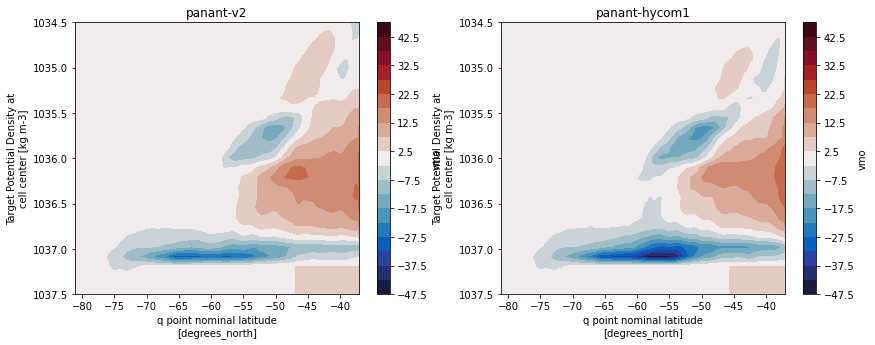

In [6]:
plt.figure(figsize=(14,5))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_year1 = vmo.isel(time=slice(0,11)).mean('time').sum('xh').load()/1e9
    plt.subplot(1,2,ii)
    vmo_year1.cumsum('rho2_l').plot.contourf(levels=np.arange(-47.5,48,5),cmap=cm.cm.balance)
    plt.ylim([1034.5,1037.5])
    plt.gca().invert_yaxis()
    plt.title(expt)


## Plot overturning over last year for both expts

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
distributed.worker - WARNING - gc.collect() took 1.489s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.
distributed.worker - WARNING - gc.collect() took 1.510s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.
/g/da

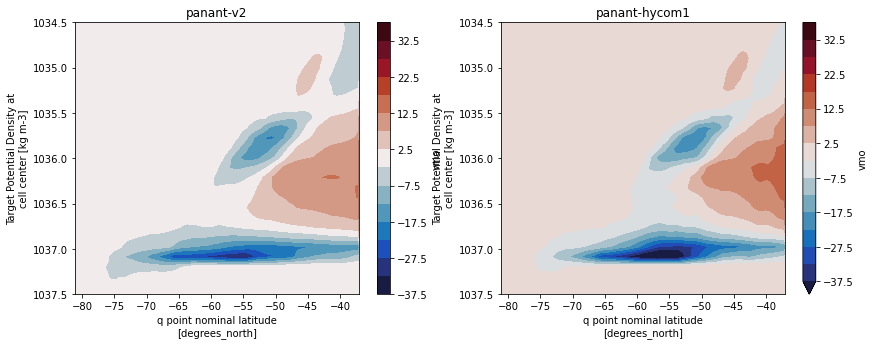

In [7]:
plt.figure(figsize=(14,5))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60})
    vmo_lastyear = vmo.isel(time=slice(-12,)).mean('time').sum('xh').load()/1e9
    plt.subplot(1,2,ii)
    vmo_lastyear.cumsum('rho2_l').plot.contourf(levels=np.arange(-37.5,38,5),cmap=cm.cm.balance)
    plt.ylim([1034.5,1037.5])
    plt.gca().invert_yaxis()
    plt.title(expt)

## Plot timeseries of overturning

Look at extrema at several different latitudes

Text(0.5, 1.0, 'Abyssal cell transport - 65°S')

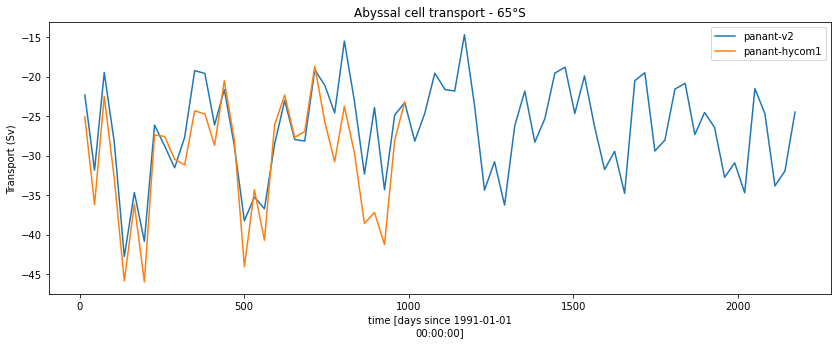

In [24]:
plt.figure(figsize=(14,5))
lat = -65
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Abyssal cell transport - 55°S')

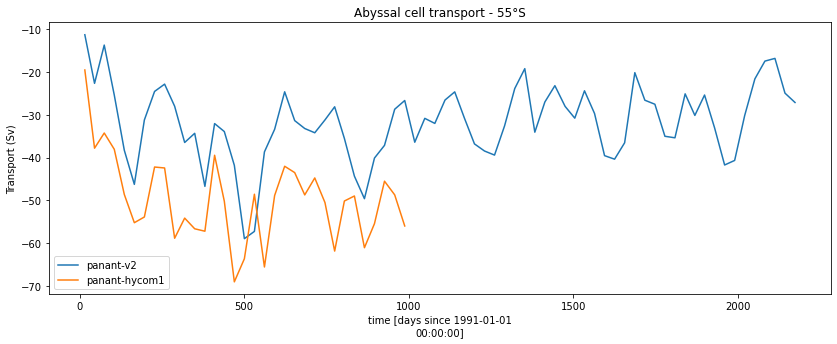

In [28]:
plt.figure(figsize=(14,5))
lat = -55
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Abyssal cell transport - 45°S')

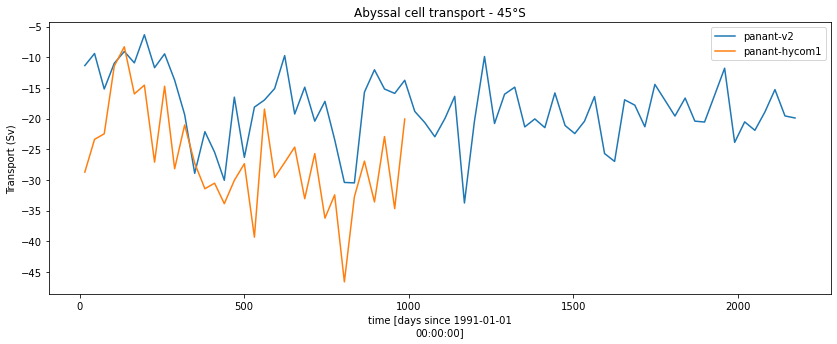

In [29]:
plt.figure(figsize=(14,5))
lat = -45
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Upper cell transport - 45°S')

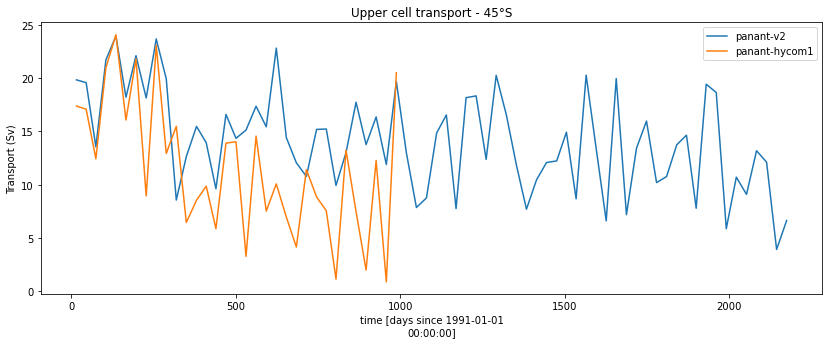

In [30]:
plt.figure(figsize=(14,5))
lat = -45
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Upper cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Upper cell transport - 37°S')

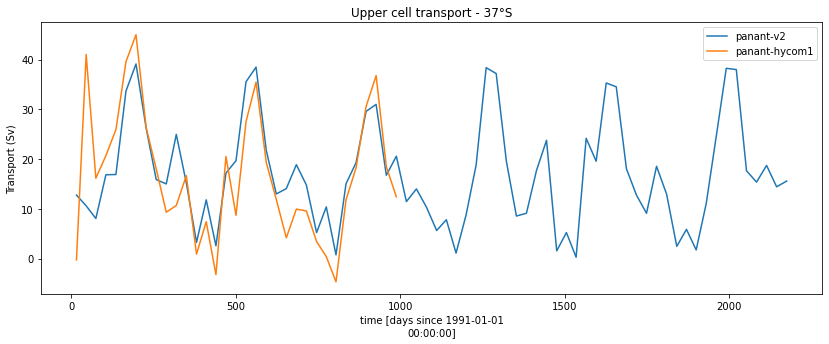

In [31]:
plt.figure(figsize=(14,5))
lat = -37
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Upper cell transport - %d°S'%(-lat))